In [2]:
import numpy as np
import matplotlib.pyplot as plt
len('Гончаров Глеб Игоревич') % 30
#Variant 22

22

<b><center>Вариант 22</center></b> 
<center>Гончаров Глеб</center>
<b>Задача 2.5</b>
Найти приближенно корень уравнения f(x)=0, принадлежащий отрезку [a,b], с точностью
ε = 10−5 , используя модификацию* метода Ньютона для случая кратного корня при значениях m=1,2,3,4,5. По
числу итераций определить кратность корня.
$$F(x)=ctgx+2x+πx−1−\frac{π}{2}−2x2 −\frac{π^2}{8}$$$$[a,b]=[0,1]$$

f(x)=ctx + 2x + pi x - 1 - pi/2 - 2x^2 - pi^2/8

In [3]:
def function(x):
    return 1 / np.tan(x) + 2 * x + np.pi * x  - 1 - np.pi / 2 - 2 * x ** 2 - np.pi ** 2 / 8 
x=np.linspace(0.78, 0.79, 100)
y=function(x)

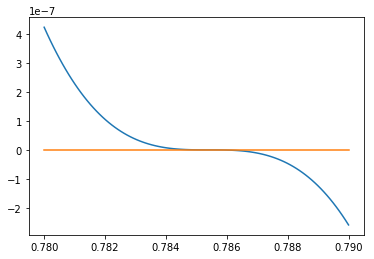

In [4]:
#Построим график функции
plt.plot(x,y)
plt.plot(x,np.zeros(x.shape[0]))

Видим, что у функции один корень на данном интервале

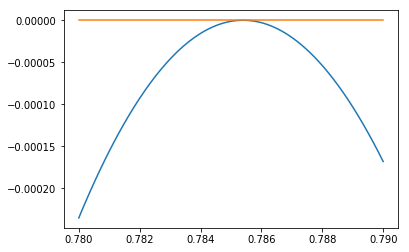

In [5]:
def der(x):
    return - 1 / (np.sin(x)) ** 2 + 2 + np.pi - 4 * x
plt.plot(x,der(x))
plt.plot(x,np.zeros(x.shape[0]))

Видим, что произодвная зануляется где-то в районе корня, но, почему-то, забиваем на это...

In [6]:
#Ну, и сам мето Ньютона, собственно
m=np.arange(1,7)
res=[] 
eps = 1e-5
it=1e5
for l in m:
    i=0
    xt = xp =0.1
    while i < it:
        xt=xp - l * function(xp) / der(xp)
        i+=1
        if np.abs(xt-xp) < eps:
            break
        xp=xt
    res.append((l,xt,i))

In [7]:
res

[(1, 0.7853819477699368, 29),
 (2, 0.785393991838005, 13),
 (3, 0.7853981815520579, 19),
 (4, 0.7853962692441926, 12),
 (5, 0.7853998745613443, 27),
 (6, 0.7872602455789789, 100000)]

Видим, что при m=4 и m=2 количества итераций минимальны (12 и 13 соотвественно) - кратность равна 2 или 4 

<b>Задача 2.10.</b> 
Функция y=f(x) задана неявно уравнением F(x,y)=0. На отрезке [1, 5] построить таблицу значений функции y=f(x) с шагом h=0.5, применяя один из методов численного решения нелинейного уравнения (с
точностью ε = 10−7 ). Построить график функции y=f(x) на заданном отрезке.
$$e^{xy} −cos(xy^3)==0$$
$$0.5 ≤ x ≤ 1.5$$
$$−1.3 ≤ y ≤ −0.3$$

Зафиксируем х=1, и построим две функции $$f(x,y)=e^{xy}$$  и $$f(x,y)=cos(xy^3)$$ Точка пересечения - это будет значения y, которое удовлетворять равенству. 

exp(xy)-cos(xy^3)==0 0.5<=x<=1.5, -1.3<=y<=-0.3

In [8]:
def func(x,y):
    return np.exp(x * y) - np.cos(x * (y ** 3))

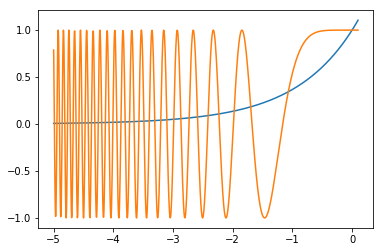

In [9]:
#Это я взял и зафиксировал х
y=np.linspace(-5,.1,1000)
plt.plot(y,np.exp(y))
plt.plot(y,np.cos(y ** 3));

Зафиксируем теперь х=5

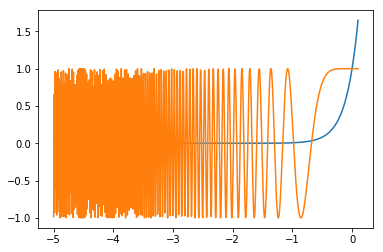

In [10]:
plt.plot(y,np.exp(5*y))
plt.plot(y,np.cos(5*y ** 3));

Посмотрим меняет ли знак функция на интервале, включающем наш корень. 

In [11]:
def derfun(x0,y):
    return x0 * (np.exp(x0 * y) + np.sin(x0 * (y ** 3)) * y ** 2)

In [12]:
maxiter=100
x=np.linspace(1,5,9)
y=[]
eps=1e-7
for x0 in x:
    i=0
    y0=-1
    while i < maxiter:
        i+=1
        h=func(x0,y0) /  derfun(x0,y0)
        y0=y0 - h
        if np.abs(h)< eps:
            y.append((x0,y0,i))
            break
y

[(1.0, 6.222993568288714e-17, 5),
 (2.0, -3.6569932808707436e-17, 15),
 (2.5, -3.1794601700354606e-17, 7),
 (3.0, -6.376066566646041e-18, 14),
 (3.5, 1.4488324490896702e-15, 8),
 (4.5, -1.9519753620659366e-17, 11),
 (5.0, 9.970479105858068e-18, 11)]

Ага, сошлось к каким-то другим кор

In [13]:
eps=1e-7
maxsteps=100
root=[]
for x0 in x:
    ya,yb=-.001,-1.2
    d=np.abs(ya-yb)
    for i in range(maxsteps):
        d/=2
        y0=ya-d
        if (d < eps) or (np.abs(func(x0,y0)) < eps):
            root.append((x0,y0,i))
            break;
        if np.sign(func(x0,y0)) == np.sign(func(x0,ya)):
            ya=y0
        else:
            yb=y0


[(1.0, -1.068575869500637, 23),
 (1.5, -0.9611856729388237, 23),
 (2.0, -0.8880475431084633, 23),
 (2.5, -0.8331695401072503, 23),
 (3.0, -0.7896365453004838, 22),
 (3.5, -0.7538231615424157, 23),
 (4.0, -0.7235896262526512, 23),
 (4.5, -0.6975665799975395, 23),
 (5.0, -0.674825393974781, 23)]

## Все класс - сошлось к нужному корню

### Попробуем построить нашу функцию


In [20]:
from itertools import product
x,y = np.linspace(0.5,1.5,50), np.linspace(-1.5,-0.3,1e6)
x = np.array(list(product(x, y)))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


#### Мы возьмем декартовое произведение $$Y*X$$ и найдем х и у такие, что значение функции $$f(x,y)=0$$

In [16]:
f=np.vectorize(func)

In [22]:
eps=1e-6
dots=x[np.abs(f(x[:,0],x[:,1])) < eps]

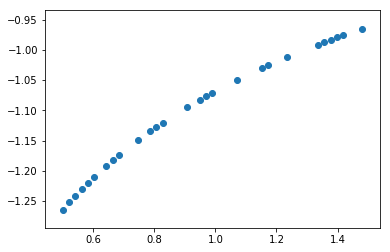

In [23]:
plt.scatter(dots[:,0],dots[:,1]);

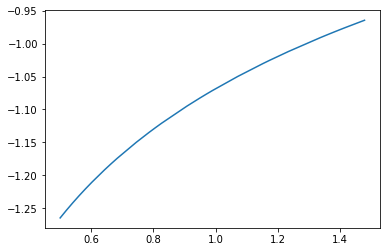

In [24]:
plt.plot(dots[:,0],dots[:,1]);

#### Вот такой халтуркой мы построили график. Это все значения на прямоуголнике $$[0.5,1.5]x[-1.3,-0.3]$$